In [80]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from collections import Counter

## Load Data

In [2]:
DATA_DIR = Path("../data/")

In [3]:
dialog_csv = DATA_DIR / "dialogues.csv"
summary_pieces_csv = DATA_DIR / "summary_pieces.csv"

reference_dialog_csv = DATA_DIR / "reference_dialogues.csv"
reference_summaries_csv = DATA_DIR / "reference_summaries.csv"

In [18]:
df_dialog = pd.read_csv(dialog_csv)
df_summary_pieces = pd.read_csv(summary_pieces_csv)

df_reference_dialog = pd.read_csv(reference_dialog_csv)
df_reference_summaries = pd.read_csv(reference_summaries_csv)

In [6]:
# group summaries by dialog
df_dialog_summaries = df_reference_summaries.sort_values("position_index").groupby("dialog_id").agg(list).reset_index()

## View Samples 

In [7]:
dialog_id, dialogue = df_reference_dialog.sample().iloc[0][["id", "dialogue"]]
pieces, pos = df_dialog_summaries.query(f"dialog_id == '{dialog_id}'").iloc[0][["summary_piece", "position_index"]]

In [8]:
print(" Dialog \n============")
print(dialogue)

print(" Summary \n============")
for p, s in zip(pos, pieces):
    print(f"{p}:    {s}")

 Dialog 
Anita: God, I'm trying to chose some xmas gifts.
Anita: It's a nightmare!
Annabel: I know what u mean!
Annabel: I have no idea what to buy for my mother and father...
Anita: U can say that again...
Annabel: What did you get yours last year?
Anita: I can't even remeber...
Anita: But I think a few books, some cosmetics for my mother, some scent etc. 
Annabel: I see. 
Annabel: I usually try to ask them indirectly during the year what they need.
Anita: Cunning!
Anita: I'll try next year :D
Annabel: Have u got any ideas for this year?
Anita: Not really.
Anita: Although I was thinking of buying my father a camera. 
Anita: They are going on a holiday soon and he always complains that my camera is too big. 
Anita: So I though I'd buy him sth smaller.
Anita: What do you think?
Annabel: It's a wonderful idea!
Anita: Thx! I'll go with it then :) 
 Summary 
0:    Anita and Annabel have a hard time looking for Christmas gifts for their parents.
1:    They exchange some ideas.
2:    Anita w

## EDA

### Dialogs Length 

In [48]:
df_dialog["n_sentences"] = df_dialog["dialogue"].apply(lambda x: len(x.split("\n")))
df_dialog["n_words"] = df_dialog["dialogue"].apply(lambda x: len(x.split()))

Text(0, 0.5, 'Count')

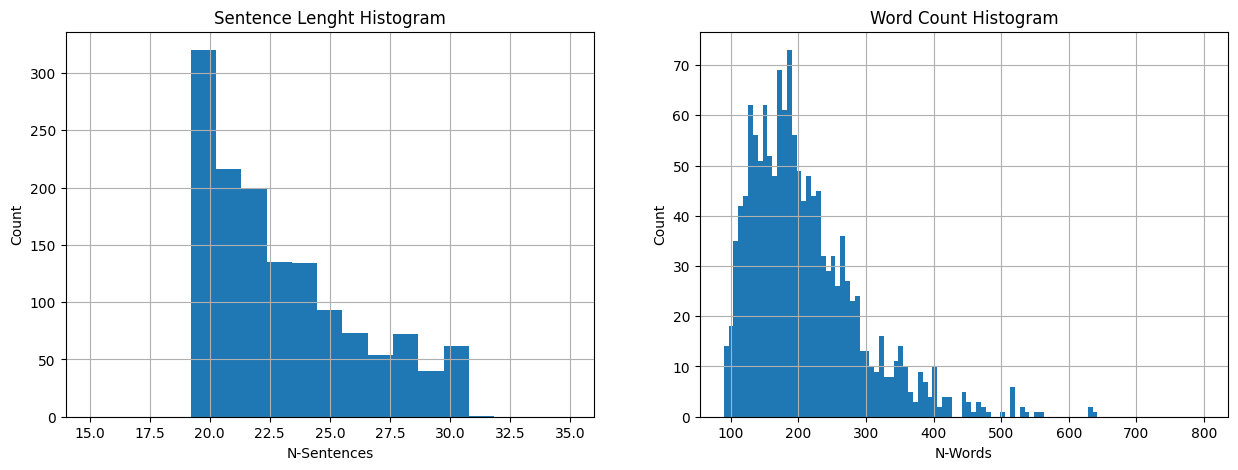

In [51]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df_dialog["n_sentences"].hist(bins=np.linspace(15, 35, 20), ax=axs[0])
axs[0].set_title("Sentence Lenght Histogram")
axs[0].set_xlabel("N-Sentences")
axs[0].set_ylabel("Count")

df_dialog["n_words"].hist(bins=np.linspace(90, 800, 100), ax=axs[1])
axs[1].set_title("Word Count Histogram")
axs[1].set_xlabel("N-Words")
axs[1].set_ylabel("Count")

In [54]:
df_summary_pieces

,summary_piece
0,Eric also invited his friend with his girlfriend.
1,Nathalie needs to hand in an assignment before...
2,School scheduled midterms for the second week ...
3,Jake didn't eat anything since 4 that day.
4,It will be $100 for each person for 4 nights.
...,...
3991,They advise Cindy to wear stilettos instead of...
3992,Sakis visited her a week ago.
3993,Mr. Alphonse Wilson prefers PR actions but the...
3994,The hard disc is gone.


# Summary Length

In [55]:
df_summary_pieces["n_sentences"] = df_summary_pieces["summary_piece"].apply(lambda x: len(x.split("\n")))
df_summary_pieces["n_words"] = df_summary_pieces["summary_piece"].apply(lambda x: len(x.split()))

Text(650.9659090909089, 0.5, 'Count')

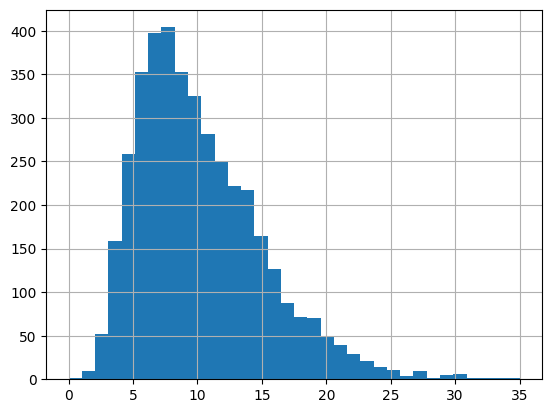

In [59]:
df_summary_pieces["n_words"].hist(bins=np.linspace(0, 35, 35))
axs[1].set_title("Word Count Histogram")
axs[1].set_xlabel("N-Words")
axs[1].set_ylabel("Count")

### Summaries Per dialog

In [64]:
print(f"Expected Avg of {round(len(df_summary_pieces) / len(df_dialog), 2)} summaries for each dialog")

Expected Avg of 2.85 summaries for each dialog


Text(650.9659090909089, 0.5, 'Count')

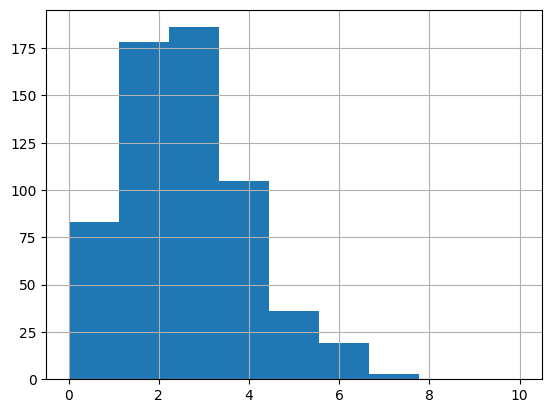

In [71]:
df_dialog_summaries["n"] = df_dialog_summaries["position_index"].apply(len)
df_dialog_summaries["n"].hist(bins=np.linspace(0, 10, 10))
axs[1].set_title("N - Summaries (Reference Data)")
axs[1].set_xlabel("N-Pieces")
axs[1].set_ylabel("Count")

In [73]:
def standartize_text(text: str) -> str:
    """
    Preprocess text data.
    :param text: text to preprocess
    :param tokenizer: tokenizer

    - convert to lower case
    - remove non-ascii characters, punctuation and extra spaces.
    - tokenize the text
    """
    # convert to lower case
    text = text.lower()

    # remove non-ascii characters
    text = text.encode("ascii", "ignore").decode()

    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text


### Word Frequency 

In [103]:
# checking data thats available for fine tune SQuAD
all_words = []
for dialog in df_dialog["dialogue"]:
    all_words.extend(standartize_text(dialog).split())

for piece in df_summary_pieces["summary_piece"]:
    all_words.extend(standartize_text(piece).split())

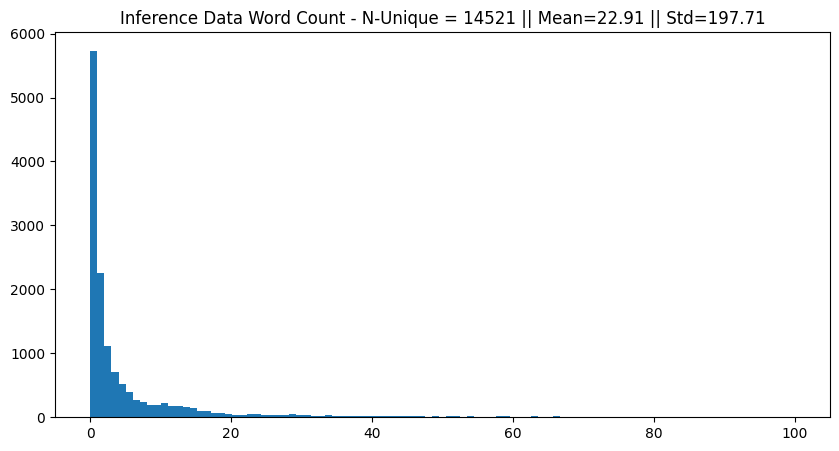

In [104]:
infer_word_counter = Counter(all_words)
infer_unique_words = set(infer_word_counter.keys())
infer_word_count = list(infer_word_counter.values())
plt.figure(figsize=(10, 5))
plt.hist(ref_word_count, bins=np.linspace(0, 100, 100))
plt.title(f"Inference Data Word Count - N-Unique = {len(infer_word_count)} || Mean={np.mean(infer_word_count).round(2)} || Std={np.std(infer_word_count).round(2)}")
plt.show()

In [105]:
# checking data thats available for fine tune SQuAD
all_words = []
for dialog in df_reference_dialog["dialogue"]:
    all_words.extend(standartize_text(dialog).split())

for piece in df_reference_summaries["summary_piece"]:
    all_words.extend(standartize_text(piece).split())

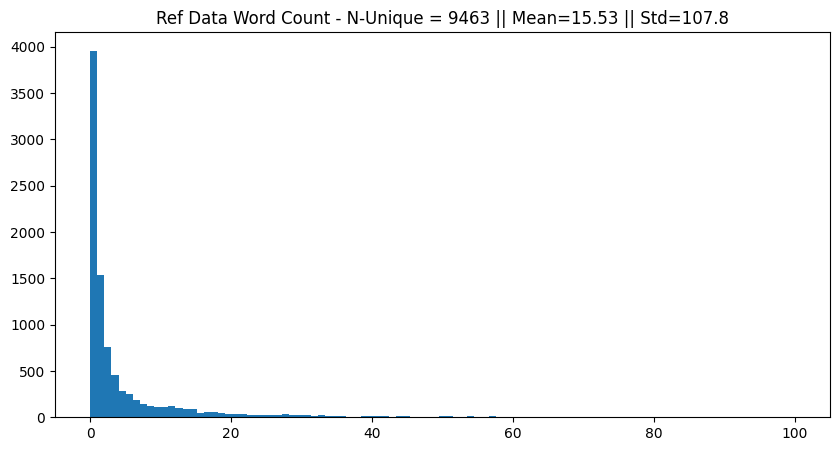

In [106]:
ref_word_counter = Counter(all_words)
ref_unique_words = set(ref_word_counter.keys())
ref_word_count = list(ref_word_counter.values())
plt.figure(figsize=(10, 5))
plt.hist(ref_word_count, bins=np.linspace(0, 100, 100))
plt.title(f"Ref Data Word Count - N-Unique = {len(ref_word_count)} || Mean={np.mean(ref_word_count).round(2)} || Std={np.std(ref_word_count).round(2)}")
plt.show()

### Intesectiin over union of words in train/test set

In [109]:
len(ref_unique_words.intersection(infer_unique_words)) / len(ref_unique_words.union(infer_unique_words))

0.3636570388901524